In [12]:
import numpy as np
import pandas as pd
import json

with open('C:/Users/Saad/Downloads/archive/profiles.json') as f:  # load json file
    data = json.load(f)

## Data Structure:
* **profiles**
    - **car**
        - *id*
        - *license_plate*
        - *brand*
        - *model*
        - *production_year*
        - *data_source*
    - **trips**
        - *driver*
            - id
            - first_name
            - last_name
            - gender
        - *distance* (Km)
        - *start_location*
            - latitude
            - longitude
        - *start_time* (trip recorded start time)
        - *end_time* ((trip recorded end time)
        - *last_break* (seconds: pause time after previous trip end)
        - *best_available_short* (1F, 3F, fast or None: fastest available charger < 1Km of start location)
        - *is_home* (True/False: trip starts < 1Km of driver's home location)
        - *is_work* (True/False: trip starts < 1Km of driver's office location)
        - *can_recharge* (True/False: car did not move > 1Km in-between recorded spots)

In [13]:
len(data['profiles']) # 16 profiles

16

In [14]:
data['profiles'][0]['car'] # Car for first profile

{'id': 15,
 'license_plate': 'WI361HF',
 'brand': 'Ford',
 'model': 'FOCUS',
 'production_year': 2018,
 'data_source': 'dfm'}

In [15]:
data['profiles'][0]['trips'][0] # First trip of the first profile

{'driver': {'id': 62,
  'first_name': 'Dorota',
  'last_name': 'Mańkowska',
  'gender': 'female'},
 'distance': 37.4503324547605,
 'start_location': {'latitude': 52.14920234483962,
  'longitude': 21.055473350109075},
 'start_time': '2021-06-29T12:54:41Z',
 'end_time': '2021-06-29T13:58:33Z',
 'last_break': 124,
 'best_available_short': None,
 'is_home': False,
 'is_work': False,
 'can_recharge': True}

### Making data usable for pandas by reducing it to a one-layer structure

1) Adding license plate within trip data (it's usually contained at a higher level, in the profile data)


In [16]:
for profile in data['profiles']:
    for trip in profile['trips']:
        trip['car_license_plate'] = profile['car']['license_plate']

2) Removing Layers: we are mainly interested in trip data

In [17]:
trip_data = [
    trip for profile in data['profiles'] for trip in profile['trips']
]

In [18]:
len(trip_data)  # 1756 total trips

1756

In [19]:
trip_data[0] # Only one layer

{'driver': {'id': 62,
  'first_name': 'Dorota',
  'last_name': 'Mańkowska',
  'gender': 'female'},
 'distance': 37.4503324547605,
 'start_location': {'latitude': 52.14920234483962,
  'longitude': 21.055473350109075},
 'start_time': '2021-06-29T12:54:41Z',
 'end_time': '2021-06-29T13:58:33Z',
 'last_break': 124,
 'best_available_short': None,
 'is_home': False,
 'is_work': False,
 'can_recharge': True,
 'car_license_plate': 'WI361HF'}

In [20]:
for t in trip_data:  # Re-structuring data for pandas import
    t['driver'] = t['driver']['id']
    t['latitude'] = t['start_location']['latitude']
    t['longitude'] = t['start_location']['longitude']
    t.pop('start_location')

In [21]:
trip_data[0]

{'driver': 62,
 'distance': 37.4503324547605,
 'start_time': '2021-06-29T12:54:41Z',
 'end_time': '2021-06-29T13:58:33Z',
 'last_break': 124,
 'best_available_short': None,
 'is_home': False,
 'is_work': False,
 'can_recharge': True,
 'car_license_plate': 'WI361HF',
 'latitude': 52.14920234483962,
 'longitude': 21.055473350109075}

In [37]:
trips_df = pd.DataFrame.from_dict(trip_data)
trips_df.head()

,driver,distance,start_time,end_time,last_break,best_available_short,is_home,is_work,can_recharge,car_license_plate,latitude,longitude
0,62,37.450332,2021-06-29T12:54:41Z,2021-06-29T13:58:33Z,124,None,False,False,True,WI361HF,52.149202,21.055473
1,62,1.287687,2021-06-29T12:47:19Z,2021-06-29T12:52:37Z,14380,None,False,False,True,WI361HF,52.142642,21.053358
2,62,1.188009,2021-06-29T08:43:25Z,2021-06-29T08:47:39Z,1711,None,False,False,True,WI361HF,52.149121,21.055582
3,62,1.289794,2021-06-29T08:08:36Z,2021-06-29T08:14:54Z,53180,None,True,False,True,WI361HF,52.142666,21.053435
4,62,1.159372,2021-06-28T17:17:53Z,2021-06-28T17:22:16Z,1874,None,False,False,True,WI361HF,52.149386,21.055213
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,52,45.514643,2021-06-23T15:31:02Z,2021-06-23T16:02:48Z,12801,None,False,True,True,WI480HF,52.373618,20.788366
1752,52,56.148723,2021-06-23T11:14:29Z,2021-06-23T11:57:41Z,887,None,False,False,True,WI480HF,52.683530,20.246949
1753,52,2.542226,2021-06-23T10:54:21Z,2021-06-23T10:59:42Z,66790,None,True,False,True,WI480HF,52.689482,20.252270
1754,52,56.315483,2021-06-22T15:34:49Z,2021-06-22T16:21:11Z,1731242,None,True,True,True,WI480HF,52.373631,20.788377


In [23]:
license_plates = trips_df.car_license_plate.unique() # Distinct license plates
license_plates

array(['WI361HF', 'WI090HP', 'WU7944J', 'WI483HF', 'WZ5957S', 'WZ5952S',
       'WU7441J', 'WI074HJ', 'WZ5956S', 'WT2661A', 'WI089HP', 'WU7451J',
       'WY4056L', 'WT4931A', 'WU7588J', 'WI480HF'], dtype=object)

Trips for a given car:

In [49]:
trips_df

,driver,distance,start_time,end_time,last_break,best_available_short,is_home,is_work,can_recharge,car_license_plate,latitude,longitude
0,62,37.450332,2021-06-29T12:54:41Z,2021-06-29T13:58:33Z,124,None,False,False,True,WI361HF,52.149202,21.055473
1,62,1.287687,2021-06-29T12:47:19Z,2021-06-29T12:52:37Z,14380,None,False,False,True,WI361HF,52.142642,21.053358
2,62,1.188009,2021-06-29T08:43:25Z,2021-06-29T08:47:39Z,1711,None,False,False,True,WI361HF,52.149121,21.055582
3,62,1.289794,2021-06-29T08:08:36Z,2021-06-29T08:14:54Z,53180,None,True,False,True,WI361HF,52.142666,21.053435
4,62,1.159372,2021-06-28T17:17:53Z,2021-06-28T17:22:16Z,1874,None,False,False,True,WI361HF,52.149386,21.055213
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,52,45.514643,2021-06-23T15:31:02Z,2021-06-23T16:02:48Z,12801,None,False,True,True,WI480HF,52.373618,20.788366
1752,52,56.148723,2021-06-23T11:14:29Z,2021-06-23T11:57:41Z,887,None,False,False,True,WI480HF,52.683530,20.246949
1753,52,2.542226,2021-06-23T10:54:21Z,2021-06-23T10:59:42Z,66790,None,True,False,True,WI480HF,52.689482,20.252270
1754,52,56.315483,2021-06-22T15:34:49Z,2021-06-22T16:21:11Z,1731242,None,True,True,True,WI480HF,52.373631,20.788377


### Average Distance of trips completed by first driver

In [50]:
trips_df[trips_df.car_license_plate == 'WI361HF'].distance.mean()

15.067165504810962

In [4]:
trips_df[['start_time']]

NameError: name 'trips_df' is not defined

### Distance Histogram for all cars

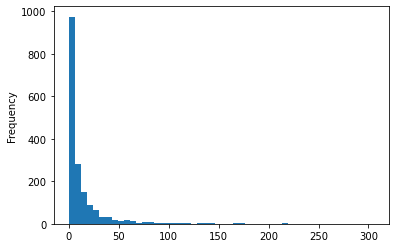

In [52]:
trips_df.distance.plot.hist(bins=50)

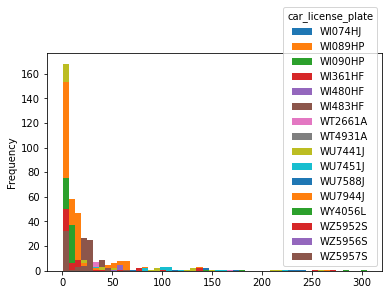

In [27]:
trips_df.pivot(columns='car_license_plate', values='distance').plot.hist(bins=50)

### Average Distance per car

In [28]:
trips_df.groupby('car_license_plate').distance.mean()

car_license_plate
WI074HJ    27.646653
WI089HP    19.598897
WI090HP     4.318667
WI361HF    12.480910
WI480HF    27.150967
WI483HF    14.372371
WT2661A    17.373807
WT4931A    14.250773
WU7441J    13.340620
WU7451J    16.472998
WU7588J    15.221358
WU7944J     5.996998
WY4056L    12.807729
WZ5952S    20.315655
WZ5956S    26.937375
WZ5957S    14.670072
Name: distance, dtype: float64

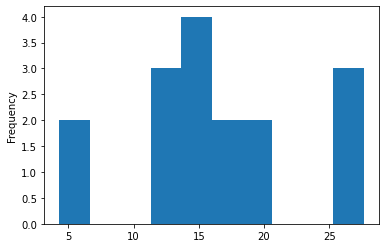

In [33]:
trips_df.groupby('car_license_plate').distance.mean().plot.hist()